# Welcome to Tutorial 2!


---

####  **This tutorial shall explore building an Environment in [Episimmer](https://github.com/healthbadge/episimmer/tree/master).**


To begin with, let us perform some initialization.


In [1]:
!pip install episimmer --no-dependencies
!git clone https://github.com/healthbadge/episimmer.git
%cd episimmer
from google.colab.patches import cv2, cv2_imshow
from google.colab import _message

Cloning into 'episimmer'...
remote: Enumerating objects: 5096, done.
remote: Counting objects: 100% (1682/1682), done.
remote: Compressing objects: 100% (695/695), done.
remote: Total 5096 (delta 1194), reused 1242 (delta 958), pack-reused 3414
Receiving objects: 100% (5096/5096), 23.32 MiB | 26.27 MiB/s, done.
Resolving deltas: 100% (3209/3209), done.
/content/episimmer


In [2]:
# Some helper functions
def read_file(file_name, len=None):
  if len is None:
    with open(file_name) as f:
      print(f.read())
  else:
    i=0
    with open(file_name) as f:
      while i < len:
        print(f.readline(), end='')
        i += 1

# Reads the contents of the colab notebook cell. You may also upload your files (particularly UserModel.py). 
def get_model_str(start_string):
  notebook_json_string = _message.blocking_request('get_ipynb', request='', timeout_sec=100)
  for cell in notebook_json_string['ipynb']['cells']:
    if cell['source'][0][:len(start_string)] == start_string:
      return ''.join(cell['source'])
  
  print("Could not find the cell with UserModel.py! Make sure the cell starts with the string you pass at the top of the cell.")


# Environment

---

### *To recap*



The basic components of Episimmer's environment are :

1. *Agents* : 
Agent form the core of the simulation. They represent the human population in the simulation that carries disease. They can have attributes like age, blood type, sex etc. In standard SIR models agents are assumed to be homogenous. 

2. *Individual Interactions* : An individual/simple interaction in Episimmer is the connecting interaction between two agents. If agents are the vertices of a graph, the interactions represent the edges. 

3. *Events* and *Locations* : Events are another type of interactions where they occur at a location. When you have a scenario with all agents interacting with each other, you should use Events. In graph terms, they represent a complete graph of Individual interactions. 

*Events and Interactions are periodic in nature. If you have 3 events and 15 timesteps, you will cycle through these 3 events 5 times.*

Additional components (derivatives) :

4. *Probabilistic Interactions* : Derivative of the individual interactions. Here, you can define a set of agents and a probability of interaction between two agents. Probabilistic Interactions are also periodic in nature.

5. *One time event* - Derivative of Events. A one-time event is an event that takes place on only specified time steps. Thus, no cycling of events takes place in one time events.



---

The following concepts show you the basics of an environments in Episimmer. Please refer to the [documentation](https://episimmer.readthedocs.io/en/latest/userguide/environment.html) for more information.


### Agents

The agents are the carriers of the disease. Let us look at how we can create agents in Episimmer.

To do so, we must create an agents text file containing the number of agents, the parameters of the agent and then the actual information of the agents, all on separate lines. We can also create a similar csv file but we shall stick to text files in this tutorial.

The agents file must have the parameter 'Agent Index' to uniquely identify each agent. 

A simple example of the agents text file is shown below 
```
10
Agent Index
0
1
2
3
4
5
6
7
8
9
```


### Individual Interactions

Interactions are simply representing a single connection between two agents. The disease can flow in only one direction and is thus unidirectional. 

For each interaction, the contacted agent will receive a probability of infection.

Let us look at how we can create interactions in Episimmer.

We must create an interactions text file containing the number of interactions, the parameters of the interaction and then the actual information of the interactions, all on separate lines. We can also create a similar csv file but we shall stick to text files in this tutorial. 

Each interaction must always have the parameters 'Agent Index' and 'Interacting Agent Index'.

A simple example of the interactions_list text file is shown below 
```
9
Agent Index:Interacting Agent Index
0:1
0:2
0:3
0:4
0:5
0:6
0:7
0:8
0:9
```


### Events

Events occur at a location in two stages. First, all the infected agents of the location contribute to a medium called ambient infection. Then, the susceptible agents are infected by this accumulated ambient infection.

Similar to Individual interactions, each susceptible agent receives a probability of infection for every event.

Events are efficient as we need to make only one pass over the agents for each stage to calculate all the probabilities for the event. Thus modelling them as interactions would be inefficient.

When we model Individual interactions as an event, we will have 
$\frac{n (n-1)}{2}$ edges and thus $n (n-1)$ individual interactions (as these interactions are unidirectional) whose probabilities we must calculate. Time complexity wise, Events run in $O(n)$ time compared to $O(n^2)$ time for interactions.  

Let us look at how we can create events in Episimmer.

We must create an events text file containing the number of events, the parameters of the event and then the actual information of the events, all on separate lines.

Each event must always have the parameters 'Location Index' and 'Agents'.

A simple example of the events text file is shown below 
```
1
Location Index:Agents
0:0,1,2,3,4,5,6,7,8,9
```



### 1. Individual Interactions

Let us use the example Stochastic_SIR_random_graph to showcase interactions. We model interactions using a interactions text file containing Agent Index and Interacting Agent Index as parameters. 

This file has the first line as the number of interactions, the second line as the parameters and third line onwards, the actual interactions.

This example has 90 interactions but we will print only the first few.

In [3]:
!mkdir interactions_example
!cp -a examples/Interaction_Spaces/Stochastic_SIR_random_graph/. interactions_example/
read_file("interactions_example/interactions_list.txt", 10)


90
Agent Index:Interacting Agent Index
1:15
15:1
4:47
47:4
4:74
74:4
4:96
96:4


Let us now run the example to get the epidemic trajectory

No Probabilistic Interaction files uploaded!
No Event files uploaded!


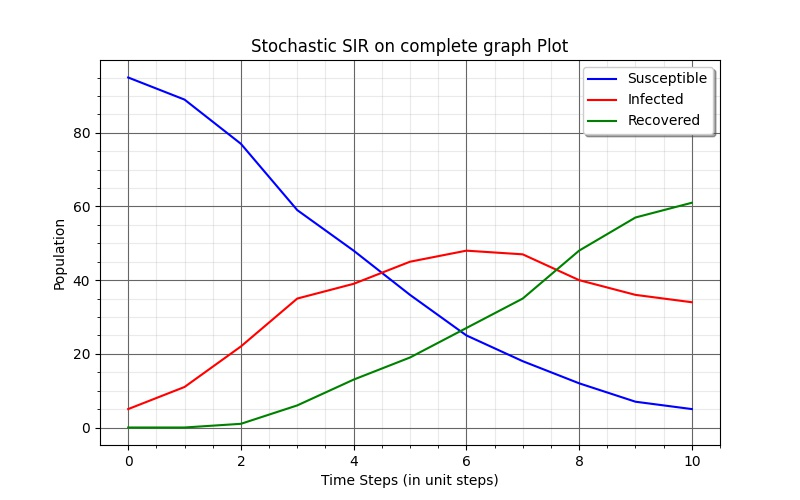

In [4]:
!python3 episimmer/main.py interactions_example -np
cv2_imshow(cv2.imread("interactions_example/results/results.jpg"))

### 2. Events

We model events using an events text file containing Location and Agents as parameters. 

This file has the first line as the number of events, the second line as the parameters and third line onwards, the actual events.

Let us use the example Stochastic_SIR to showcase events. It has 1000 agents and a single event with all the agents. Let us ease computation here and generate files with only 500 agents and a single event.

In [5]:
!mkdir events_example
!cp -a examples/Basic_Disease_Models/Stochastic_SIR/. events_example/
%cd events_example/
!python3 generate_files.py 500
%cd .. 


/content/episimmer/events_example
/content/episimmer


In [6]:
read_file("events_example/one_event.txt")

1
Location Index:Agents
0:0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,

Let us now run the example to get the epidemic trajectory

No Interaction files uploaded!
No Probabilistic Interaction files uploaded!


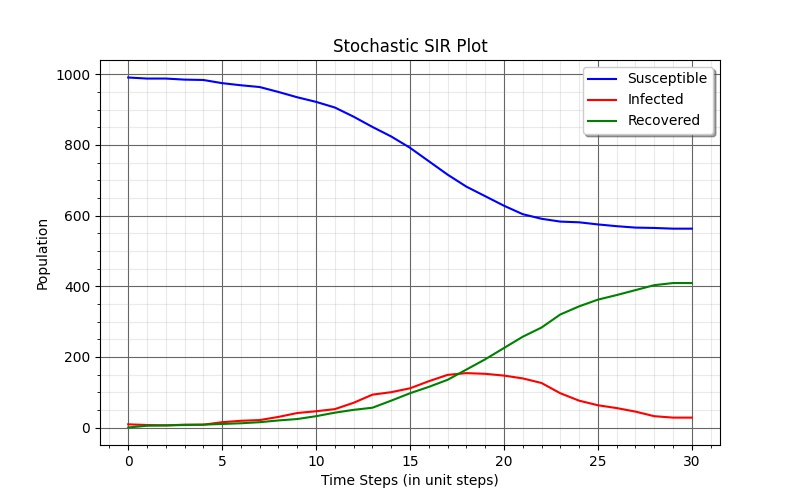

In [7]:
!python3 episimmer/main.py events_example -np
cv2_imshow(cv2.imread("events_example/results/results.jpg"))

### 3. Events vs Individual Interactions

Let us now model an event with interactions. 

We can use the example Stochastic_SIR_complete_graph for this.

This example has 20 agents currently so we will use the generate file to get a 500 agents. As mentioned above, the number of interactions for n agents in a complete graph would be $n (n-1)$. Thus for 500 agents, we would have $500 \times 499 = 249500$ interactions.

In [8]:
!mkdir interactions_complete_graph
!cp -a examples/Interaction_Spaces/Stochastic_SIR_complete_graph/. interactions_complete_graph/
%cd interactions_complete_graph/
!python3 generate_files.py 500
%cd .. 

/content/episimmer/interactions_complete_graph
/content/episimmer


In [9]:
read_file("interactions_complete_graph/complete_interactions_list.txt", 20)

249500
Agent Index:Interacting Agent Index
0:1
0:2
0:3
0:4
0:5
0:6
0:7
0:8
0:9
0:10
0:11
0:12
0:13
0:14
0:15
0:16
0:17
0:18


Now let us time their runs for comparison. Note that this run might take a while so come back in a bit.

In [12]:
import time

#Event run
start = time.time()
!python3 episimmer/main.py events_example -np &> /dev/null
print("Single Event took : {0:.2f} s".format(time.time()-start))

# Complete interactions run
start = time.time()
!python3 episimmer/main.py interactions_complete_graph -np &> /dev/null
print("Complete graph Interactions took : {0:.2f} s".format(time.time()-start))

Single Event took : 1.52 s
Complete graph Interactions took : 154.73 s


The difference in efficiency is huge as shown by the time taken. That is why it is very important to always use events when you have multiple agents interacting with each other and we do not have the information of the Individual interactions. 

### 4. Complex Agent attributes

For agents, we would like to show an example of how different attributes can be present in the agents file. For that, we shall use the Example1 example

In [11]:
# !mkdir agents_showcase
!cp -a examples/Basic_Disease_Models/Example_1/. agents_showcase/
read_file("agents_showcase/agents.txt", 20)

100
Agent Index:Type:Residence:HLA Type
0:Visitor:Outside:B
1:Visitor:Teacher Dorm:C
2:Visitor:Outside:C
3:Staff:Teacher Dorm:A
4:Student:Dorm A:A
5:Visitor:Dorm A:B
6:Administration:Teacher Dorm:C
7:Staff:Teacher Dorm:C
8:Staff:Outside:A
9:Teacher:Dorm B:B
10:Visitor:Teacher Dorm:C
11:Administration:Outside:B
12:Visitor:Outside:C
13:Staff:Outside:B
14:Staff:Dorm A:B
15:Visitor:Teacher Dorm:B
16:Staff:Outside:A
17:Staff:Dorm A:B


These attributes can easily be used to change the behaviour of agents in the environment and also how the environment can affect different agents.

### Disclaimer : These colab tutorials are only for reference and they are in no way representative of the entire functionality of Episimmer. Please look at the [Documentation](https://episimmer.readthedocs.io/en/latest/) for more details.